# Melting Point Prediction Using sklearn

In [2]:
import csv
# from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
class load_csv():
    """
    class contain many types of methods which use to read data.
    by load_csv([PATH_OF_FILE]).dataset(column, upto[row]) also read dataset and seperate feature and lable
    through load_csv([PATH_OF_FILE]).featured_dataset(upto[rows]), can also use top function(upto), and tail(upto) function
    rows upto you are selected
    """
    # specifying path by init
    def __init__(self, file_path):
        self.file = file_path

    # display dataset by two arguments column and upto
    # column = all ----- for represent all the column take's only all, and other's integer
    # upto = all ------- for representing all the data of a csv file, row also take's only all, and other's integer
    def dataset(self, column='all', upto='all'):
        '''read dataset with column number and upto rows number by default it's set on the all column 
        and all rows, but we can use number of column and rows'''
        try:
            # step to store data in row list variable
            rows = []
            # creating a function for converting string to floating point for allowing machine readable
            def float_type(point):
                floats = []
                try:
                    # converting each itration to floats
                    for i in point:
                        floats.append(float(i))
                except ValueError:
                    # except pass value error 
                    pass
                return floats

            # float converting each point not including j-dimension
            def float_type_each(point):
                try:
                    floats = float(point)
                    return floats
                except ValueError:
                    pass
                

            # open file and manipulate as csvf instance
            with open(self.file, 'r') as csvf:
                for row in csv.reader(csvf):
                    # check if all column is se
                    # print all row 
                    if column == 'all':
                        rows.append([i for i in float_type(row[:])])
                    else:
                        # else print a single particular column
                        rows.append(float_type_each(row[column]))
                # close the csv file
                csvf.close()
            # check if upto selected all
            # it's return all row
            if upto == 'all':
                return rows[:]
            else:
                # else return row upto, where you are selected
                return rows[:upto+1]
        except IndexError:
            # return error if you are selected wrong column
            return f"column {column} not exist in your dataset"
    
    def featured_dataset(self, upto='all'):
        '''featured dataset is allow to split features and lable returns two value one is feature and second is
        lable with arguments of rows'''
        try:
            # making empty to store feature in rows and lables in lable list
            feature = []
            lable = []
            def float_type(point):
                floats = []
                try:
                    for i in point:
                        floats.append(float(i))
                except ValueError:
                    pass
                return floats

            # open file and manipulate as csvf instance
            with open(self.file, 'r') as csvf:
                for row in csv.reader(csvf):
                     
                    # print all row 
                    # select all column except last most..
                    feature.append([i for i in float_type(row[:-1])])
                    # last column is selected as lables
                    lable.append(row[-1])
                # close the csv file
                csvf.close()
            # check if upto selected all
            # it's return all row
            if upto == 'all':
                return feature[1:], lable[1:]
            else:
                # else return row upto, where you are selected
                return feature[1:upto+1], lable[1:upto+1] 
        except IndexError:
            # return error if you are selected wrong column or row
            return "unexpected column/row in your dataset"

    def top(self, upto):
        '''function use for read top of the data upto desired rows'''
        select = self.dataset()
        return select[:upto]

    # this is same from above fuction but, it's use to read data rows from downward side (tail)
    def tail(self, upto):
        '''returns last most desired data points thsts, take argument as upto[rows]'''
        select = self.dataset()
        # -upto: is use for last point in list to be read upto ....
        return select[-upto:]

    def text_csv(self, upto='all'):
        '''To use for loading text data, if csv have text, character data which is exactly a string type
        load_csv(PATH_OF_FILE).text_csv(upto[rows])'''
        try:
            feature = []
            lable = []
            with open(self.file, 'r') as csvf:
                for row in csv.reader(csvf):
                    # print all row 
                    # select all column except last most..
                    feature.append(row[:-1])
                    # last column is selected as lables
                    lable.append(row[-1])
                # close the csv file
                csvf.close()
                # check if upto selected all
                # it's return all row
            if upto == 'all':
                return feature[1:], lable[1:]
            else:
                # else return row upto, where you are selected
                return feature[1:upto+1], lable[1:upto+1]
        except IndexError:
            # return error if you are selected wrong column or row
            return "unexpected column/row in your dataset"

def datasetLoader(path, cols='all'):
    Xdataset = []
    def float_type(point):
        floats = []
        try:
            # converting each itration to floats
            for i in point:
                  floats.append(float(i))
        except ValueError:
            # except pass value error 
            pass
        return floats
    
    with open(path, 'r') as rfile:
        for row in csv.reader(rfile):
            if cols != 'all':
                Xdataset.append(float_type(row[:cols]))
            else:
                Xdataset.append(float_type(row[:]))
    return Xdataset

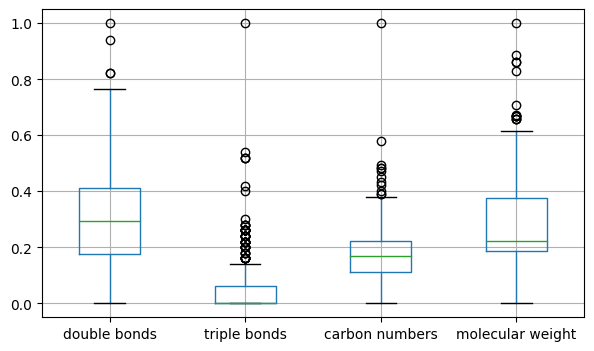

In [4]:
preprocessed_file = 'processed_datasetMP(2).csv' # 'A:/BIOINFORMAICS/ML-Training-main/11-Linear-Regression/USA_Housing.csv'
# 'processed_datasetMP(2).csv'
X = datasetLoader(preprocessed_file, cols=4)
Y = load_csv(preprocessed_file).dataset(column=5)

pd.DataFrame(X, columns=['double bonds', 'triple bonds', 'carbon numbers', 
                         'molecular weight']).boxplot(figsize=(7,4))
plt.show()

In [5]:
from sklearn import linear_model, svm
from sklearn.model_selection import train_test_split
# housing = fetch_california_housing()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=42)
linearReg = linear_model.LinearRegression()
linearReg.fit(Xtrain, Ytrain)
yPredicted = linearReg.predict(Xtest)

In [6]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('MSE: ' ,mean_squared_error(Ytest, yPredicted))
print('Model accuracy: ', round(r2_score(Ytest, yPredicted)*100, 2), '%')

MSE:  0.0024888401538249606
Model accuracy:  -4.4 %
